In [35]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import numpy as np
from tempfile import TemporaryFile
from sklearn.model_selection import train_test_split
import os
import pickle
import random
import operator
import math
import pandas as pd
import matplotlib.pyplot as  plt
from glob import glob 
import csv
import json
import librosa
import pandas as pd

# loading all the gerne audio files

In [15]:
# set directory for the source files
Data_dir= "D:/desktop/open-labs/data sets/data/genres_original"
Gerne_Names = os.listdir(Data_dir)
Gerne_paths = []
for i in Gerne_Names:
    Gerne_path = Data_dir + '/' + i
    Gerne_paths.append(Gerne_path)
      
    

# What are MFCC's and how to extract them?


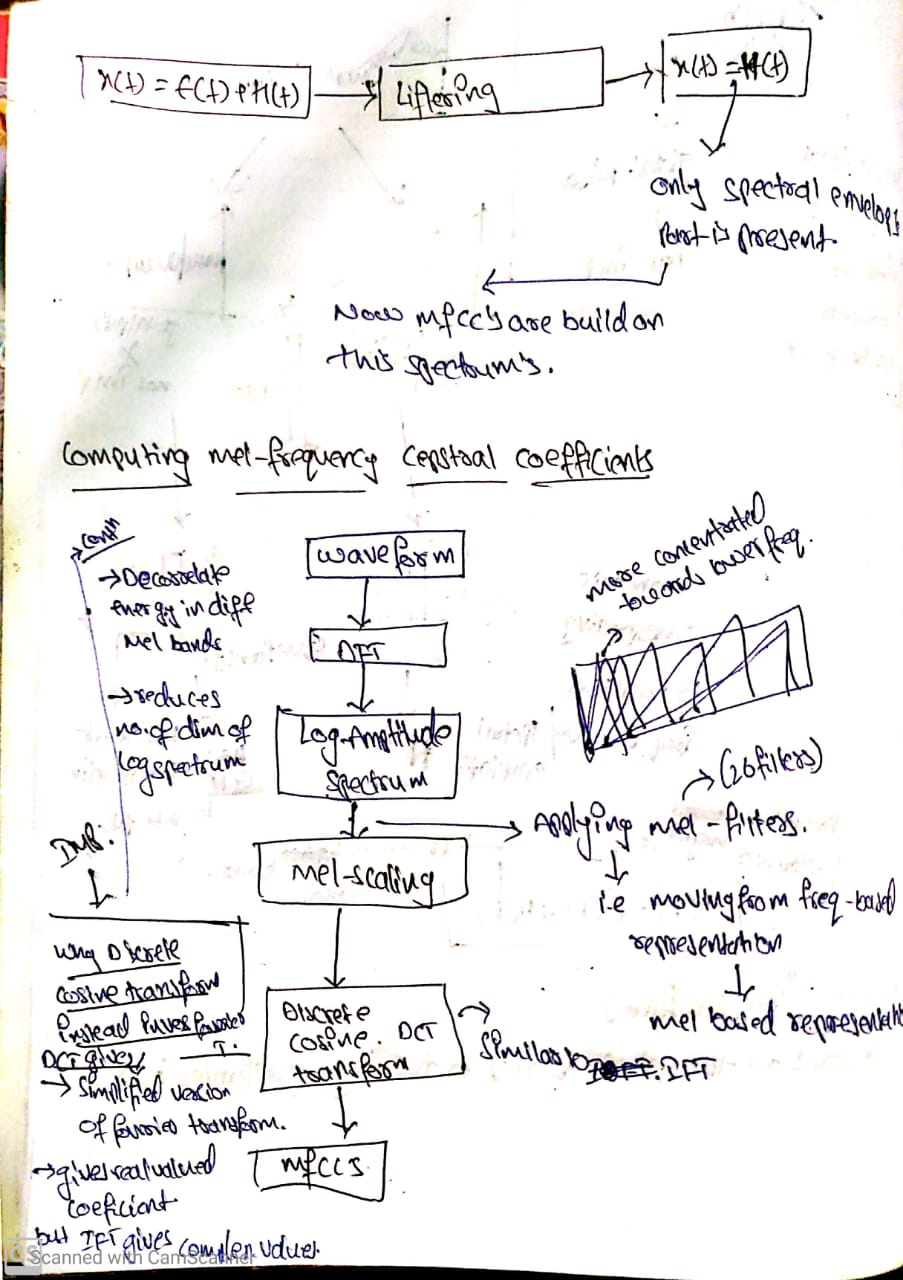

In [21]:
from IPython import display
display.Image("D:/desktop/open-labs/mfcc notes/mfcc (1).jpeg")

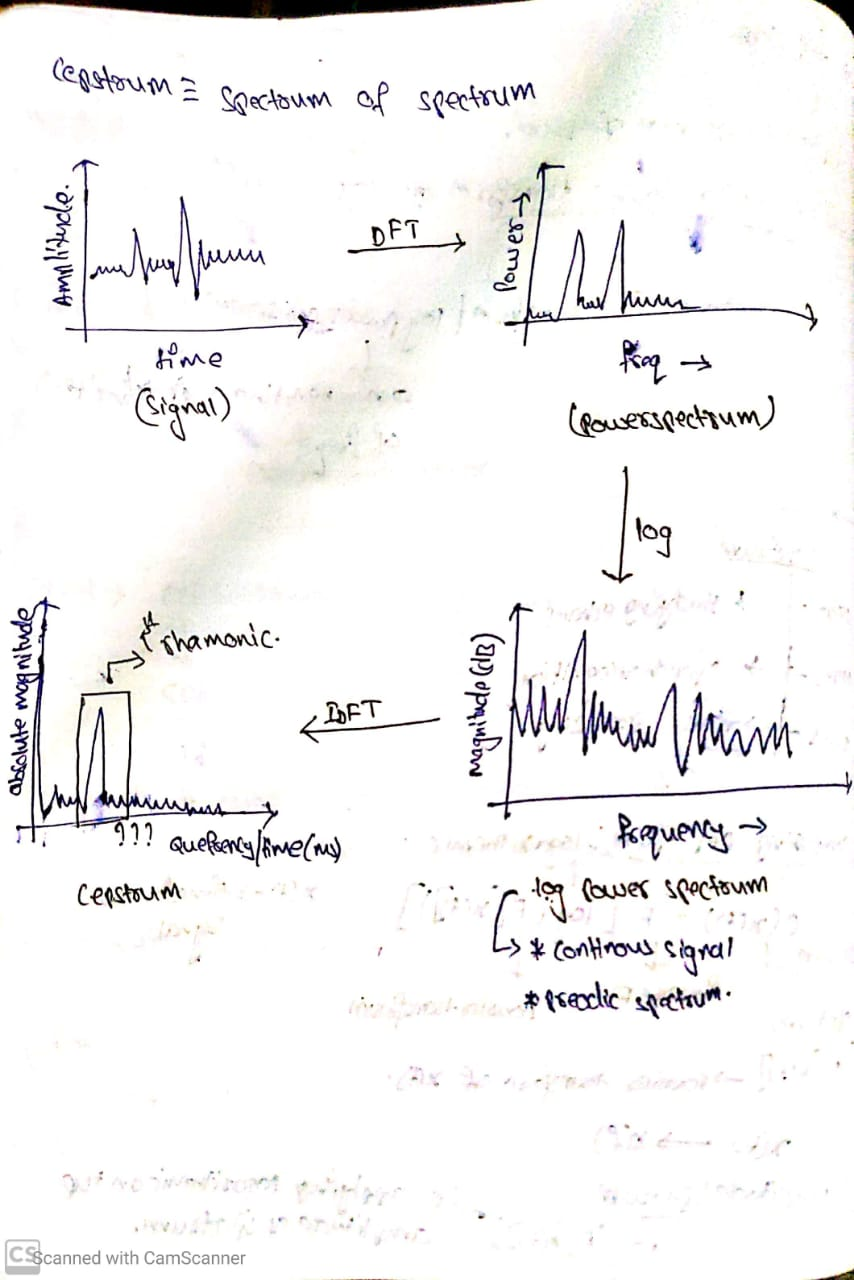

In [22]:
display.Image("D:/desktop/open-labs/mfcc notes/mfcc (5).jpeg")

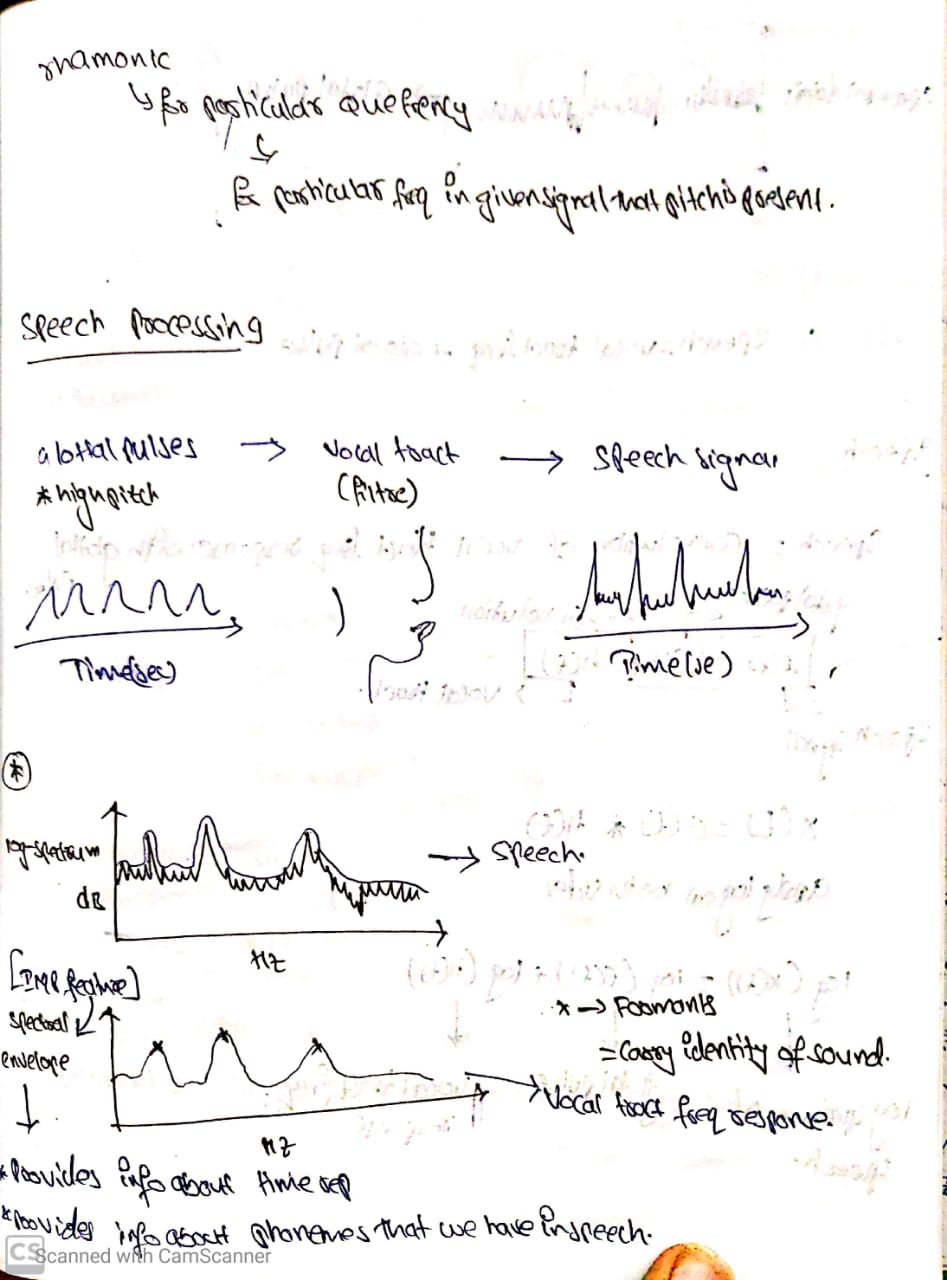

In [23]:
display.Image("D:/desktop/open-labs/mfcc notes/mfcc (3).jpeg")

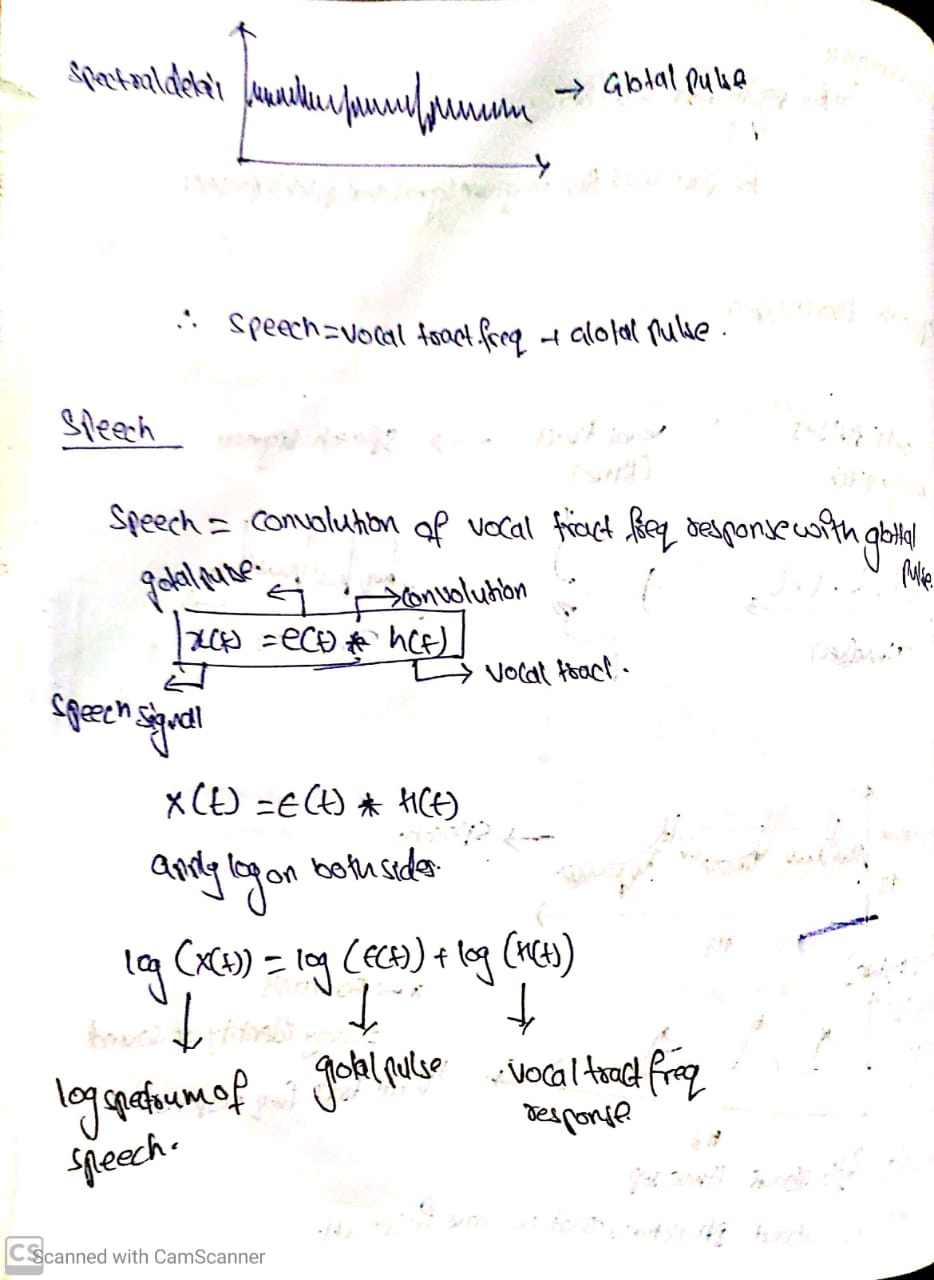

In [24]:
display.Image("D:/desktop/open-labs/mfcc notes/mfcc (4).jpeg")

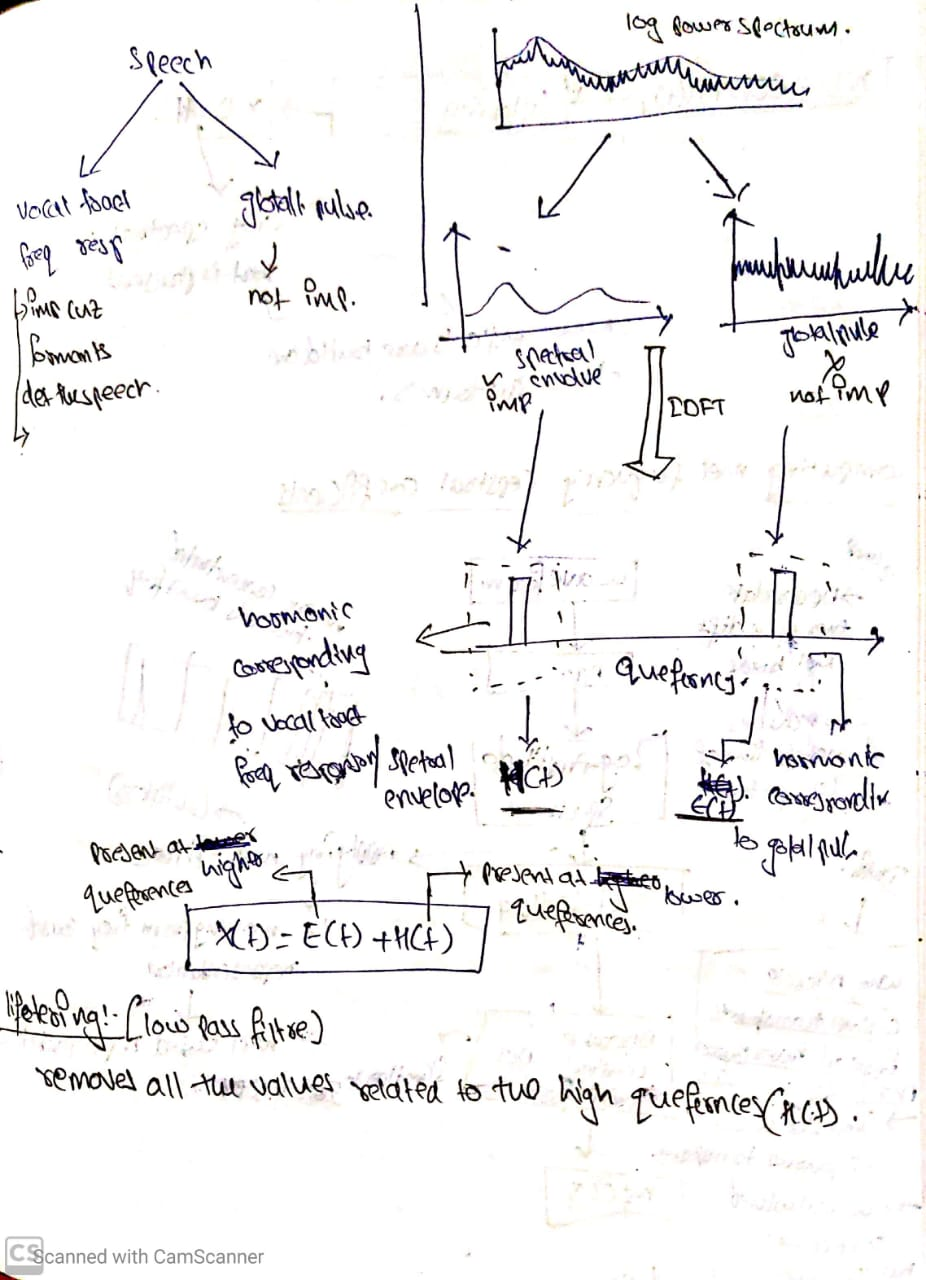

In [25]:
display.Image("D:/desktop/open-labs/mfcc notes/mfcc (2).jpeg")

# Extracting MFCC's

In [27]:
def save_mfcc(dataset_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=1):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    need = np.empty((0,13), int)

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            mapping=data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label)) # process all audio files in genre sub-dir
             # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                mfcc_feat = mfcc(signal, sample_rate, winlen=0.020, appendEnergy=False)
                mean_matrix = mfcc_feat.mean(0)
                need=np.append(need,mean_matrix)
                labels=data["labels"].append(i-1)
    return need,labels,mapping,data
    

In [55]:

def test(file_path):
    
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    type(signal)
    mfcc_feat = mfcc(signal, sample_rate, winlen=0.020, appendEnergy=False)
    mean_matrix = mfcc_feat.mean(0)
    return mean_matrix

In [40]:

DATASET_PATH = "D:/desktop/open-labs/data sets/genres"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
mfcc,labels,mapping,data=save_mfcc(DATASET_PATH,num_segments=10)


Processing: genres\blues

Processing: genres\classical

Processing: genres\country

Processing: genres\disco

Processing: genres\hiphop

Processing: genres\jazz

Processing: genres\metal

Processing: genres\pop

Processing: genres\reggae

Processing: genres\rock


In [41]:
labels=data['labels']
labels=np.array(labels)
labels.shape

(1000,)

In [42]:

t=0
temp = []
final = []
j = int(len(mfcc)/len(labels))
k = 0 
for i in range(len(labels)):
    for ele in range(k,k+j):
        t=mfcc[ele]
        temp.append(t)
        t=[]
    k+=j
    final.append([labels[i],temp[0],temp[1],temp[2],temp[3],temp[4],temp[5],temp[6],temp[7],temp[8],temp[9],
                  temp[10],temp[11],temp[12]])
    temp=[]

 


df = pd.DataFrame(final, columns = ['lables', 'mfcc1',"mfcc2", 'mfcc3', 'mfcc4',
                                    'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
                                    'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13'])

 

In [43]:
y=df.iloc[:,0:1].values
x=df.iloc[:,1:14].values

# Train and Test split

In [44]:
# split the data into train and test
features_train, features_tests, labels_train, labels_test= train_test_split(x, 
                                                                            y, 
                                                                          test_size=0.2)

# KNN CLASSIFIER

In [45]:
# KNN----> k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,p=2)
 

# p=1---> manhattan distance
# p=2---> euclidian distance
classifier.fit(features_train,labels_train)

C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [47]:
#check accuracy of our model on the test data
classifier.score(features_tests, labels_test)
0.635
#check accuracy of our model on the train data
classifier.score(features_train, labels_train)

C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.75625

# Performance metrics

In [48]:
from sklearn import metrics
predicted=classifier.predict(features_tests)
actual=labels_test

C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [49]:
# confusion matrices
print(metrics.confusion_matrix(actual,predicted))

[[12  0  3  0  0  1  2  0  1  2]
 [ 0 15  1  1  0  0  1  0  0  0]
 [ 1  0 12  1  0  0  0  1  0  1]
 [ 0  0  4  7  1  0  0  1  0  6]
 [ 0  0  1  2  6  2  4  2  1  2]
 [ 1  5  1  1  0  9  0  0  0  1]
 [ 2  0  1  1  0  0 14  0  0  0]
 [ 0  0  3  2  2  1  0 15  0  0]
 [ 0  0  2  1  7  1  0  3 12  0]
 [ 3  2  2  3  1  1  1  0  1  7]]


In [50]:
# precision,recall
print(metrics.classification_report(actual,predicted,digits=3))

              precision    recall  f1-score   support

           0      0.632     0.571     0.600        21
           1      0.682     0.833     0.750        18
           2      0.400     0.750     0.522        16
           3      0.368     0.368     0.368        19
           4      0.353     0.300     0.324        20
           5      0.600     0.500     0.545        18
           6      0.636     0.778     0.700        18
           7      0.682     0.652     0.667        23
           8      0.800     0.462     0.585        26
           9      0.368     0.333     0.350        21

    accuracy                          0.545       200
   macro avg      0.552     0.555     0.541       200
weighted avg      0.562     0.545     0.541       200



# k vs Accuracy

C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Minimum error:- 0.899125 at K = 37


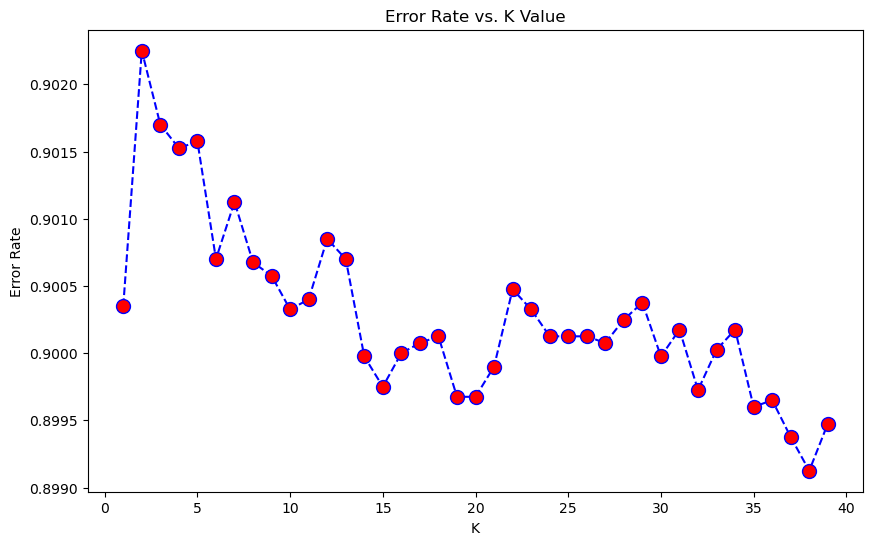

In [51]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(features_train,labels_train)
 pred_i = knn.predict(features_tests)
 error_rate.append(np.mean(pred_i != labels_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Prediction

In [52]:
dict={0:'blues',1:'classical',2:'country',3:'disco',4:'hiphop',5:'jazz',6:'metal',7:'pop',8:'reggae',9:'rock'}

In [56]:
file_path="D:/desktop/open-labs/testing files/country.wav"
            
            
x=test(file_path)
x=np.array(x)
x=x.reshape(1,13)

TypeError: 'numpy.ndarray' object is not callable

In [57]:
i=classifier.predict(x)
print("This music file belongs to",dict[i[0]]) 

This music file belongs to country


C:\Users\ebbea\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
